In [7]:
import numpy as np
import sys
sys.path.insert(1,r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\tracking")
from track import Track
from other_hough_transform import new_method_tracks,old_method_tracks
from artificial_tracks import create_artificial_tracks_geom
from parameters import *
import matplotlib.pyplot as plt
from track_reconstruction import plot_hits

t = np.linspace(-5,5,200)
x0 = width*n_strips/2 - t*n_layers*(thickness+thickness_screen)

# z = np.linspace(0,2*n_layers*(thickness+thickness_screen),10)

t_1 = []
x0_1 = []
t_2 = []
x0_2 = []
t_3 = []
x0_3 = []

index_bias = 99

for i,ti in enumerate(t):
    hits = create_artificial_tracks_geom(ti,x0[i],True)
    if i == index_bias:
        hits_bias = hits
    track = Track(hits)
    ti_1 = track.t
    xi0_1 = track.x0
    ti_2, xi0_2 = new_method_tracks(hits)
    xi0_3, ti_3, _ = old_method_tracks(hits)
    t_1.append(ti_1)
    t_2.append(ti_2)
    t_3.append(ti_3)
    x0_1.append(xi0_1)
    x0_2.append(xi0_2)
    x0_3.append(xi0_3)

t_1 = np.array(t_1)
x0_1 = np.array(x0_1)
t_2 = np.array(t_2)
x0_2 = np.array(x0_2)
t_3 = np.array(t_3)
x0_3 = np.array(x0_3)

err_t_1 = np.array(t-t_1)
err_x0_1 = np.array(x0-x0_1)
err_t_2 = np.array(t-t_2)
err_x0_2 = np.array(x0-x0_2)
err_t_3 = np.array(t-t_3)
err_x0_3 = np.array(x0-x0_3)




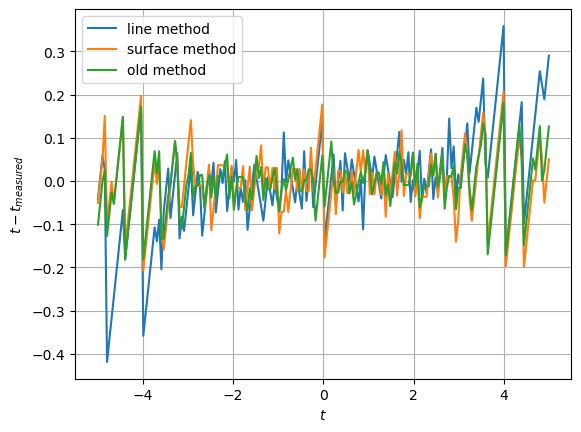

In [2]:
plt.plot(t,err_t_1,label="line method")
plt.plot(t,err_t_2,label="surface method")
plt.plot(t,err_t_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel("$t-t_{measured}$")
plt.xlabel("$t$")
plt.show()

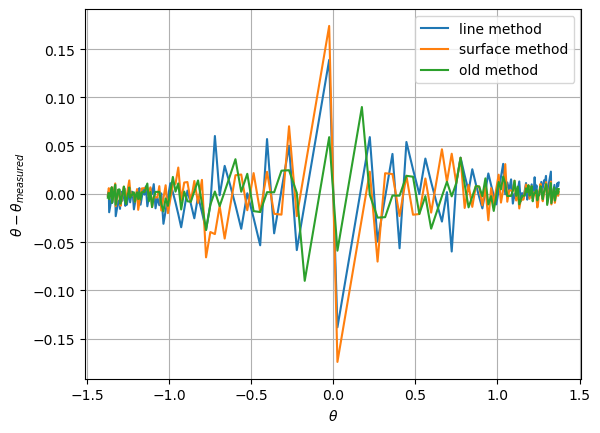

In [3]:
## Error on angle 
angle = np.arctan(t)
angle_1 = np.arctan(t_1)
angle_2 = np.arctan(t_2)
angle_3 = np.arctan(t_3)

err_angle_1 = angle-angle_1
err_angle_2 = angle-angle_2
err_angle_3 = angle-angle_3

plt.plot(angle,err_angle_1,label="line method")
plt.plot(angle,err_angle_2,label="surface method")
plt.plot(angle,err_angle_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel(r"$\theta-\theta_{measured}$")
plt.xlabel(r"$\theta$")
plt.show()


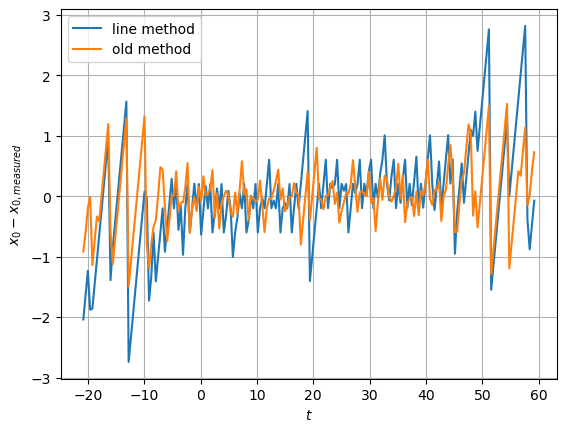

In [3]:
plt.plot(x0,err_x0_1,label="line method")
# plt.plot(x0,err_x0_2,label="surface method")
plt.plot(x0,err_x0_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel("$x_0-x_{0,measured}$")
plt.xlabel("$t$")
plt.show()

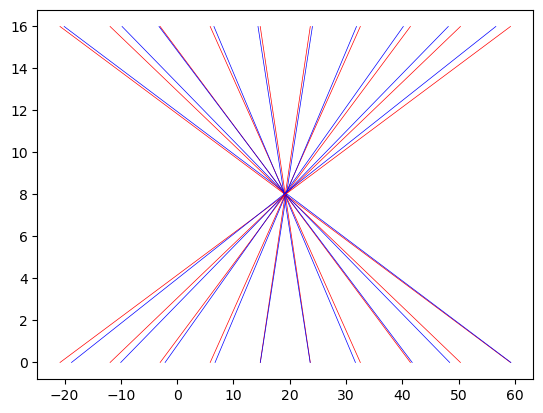

In [4]:
t = np.linspace(-5,5,10)
x0 = width*n_strips/2 - t*n_layers*(thickness+thickness_screen)

z = np.linspace(0,2*n_layers*(thickness+thickness_screen),10)

for i,ti in enumerate(t):
    hits = create_artificial_tracks_geom(ti,x0[i],True)
    track = Track(hits)
    t_1 = track.t
    x0_1 = track.x0
    plt.plot(x0[i]+ti*z,z,'r-',linewidth=0.5)
    plt.plot(x0_1+t_1*z,z,'b-',linewidth=0.5)
plt.savefig("test_offset.pdf")
plt.show()

C:\Users\nelg\AppData\Local\Temp\ipykernel_15840\3279820718.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


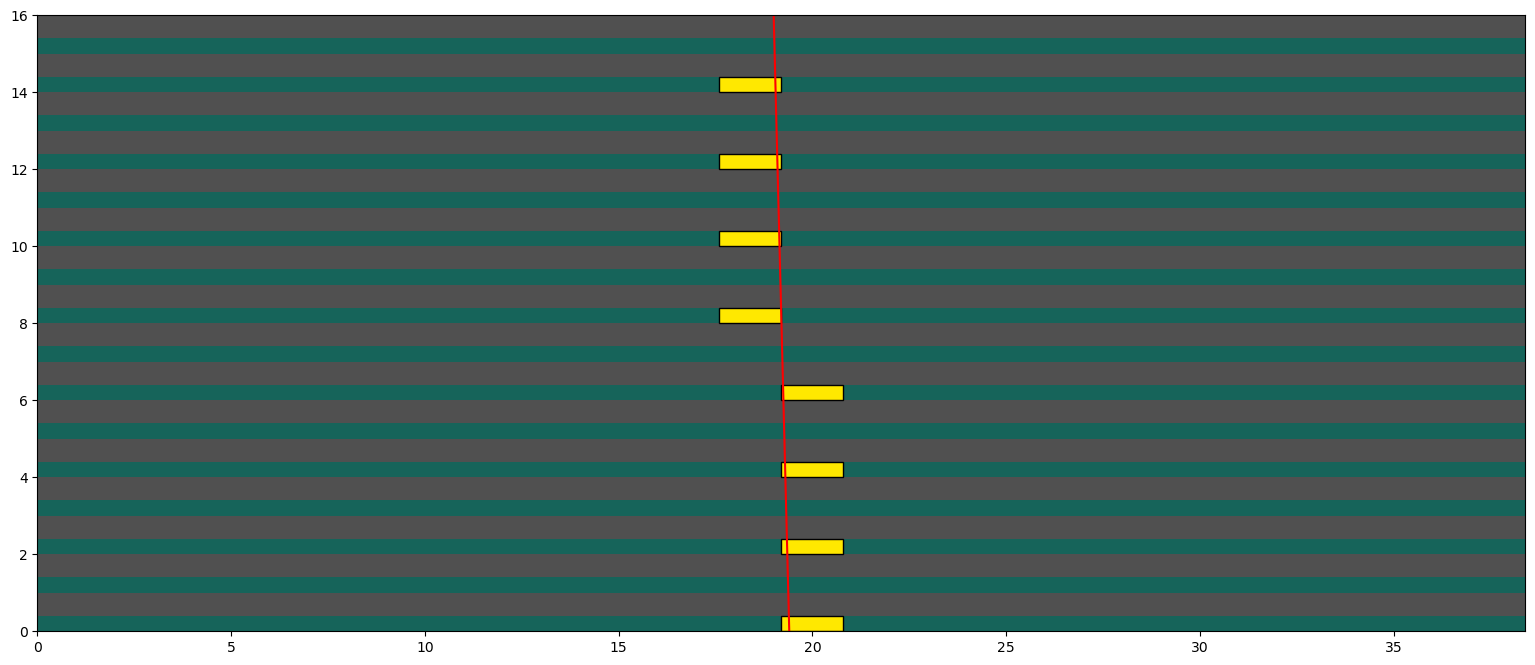

In [10]:
fig,ax = plot_hits(hits_bias)
z = np.linspace(0,16,50)
x = x0[index_bias]+t[index_bias]*z
ax.plot(x,z,'r-')
fig.show()